In [10]:
import xarray as xr

ds = xr.open_dataset("kenda-ch1-eps_MDR_3D_d_2024112109.nc")
ds

<xarray.Dataset>
Dimensions:         (time: 1, x_1: 381, y_1: 246, z_1: 29)
Coordinates:
  * time            (time) datetime64[ns] 2024-11-21T09:00:00
  * x_1             (x_1) float32 4.8e+05 4.81e+05 4.82e+05 ... 8.59e+05 8.6e+05
  * y_1             (y_1) float32 6.5e+04 6.6e+04 6.7e+04 ... 3.09e+05 3.1e+05
    lon_1           (y_1, x_1) float32 ...
    lat_1           (y_1, x_1) float32 ...
  * z_1             (z_1) float32 500.0 750.0 1e+03 ... 9e+03 9.5e+03 1e+04
Data variables: (12/16)
    grid_mapping_1  |S1 ...
    FF              (time, z_1, y_1, x_1) float32 ...
    DD              (time, z_1, y_1, x_1) float32 ...
    v_on_z          (time, z_1, y_1, x_1) float32 ...
    RELHUM          (time, z_1, y_1, x_1) float32 ...
    P               (time, z_1, y_1, x_1) float32 ...
    ...              ...
    QV              (time, z_1, y_1, x_1) float32 ...
    HZEROCL         (time, y_1, x_1) float32 ...
    TD              (time, z_1, y_1, x_1) float32 ...
    THETA           (time, z_1, y_1, x_1) float32 ...
    TOT_PREC        (time, y_1, x_1) float32 ...
    T               (time, z_1, y_1, x_1) float32 ...
Attributes:
    Conventions:     CF-1.6
    ConventionsURL:  http://cfconventions.org/cf-conventions/v1.6.0/cf-conven...
    institution:     MeteoSwiss (NMC Switzerland)
    source:          model: kenda-ch1, production_status: unknown, version: n...
    history:         Produced by fieldextra version v15.0.3 (v15.0.3) on 2025...

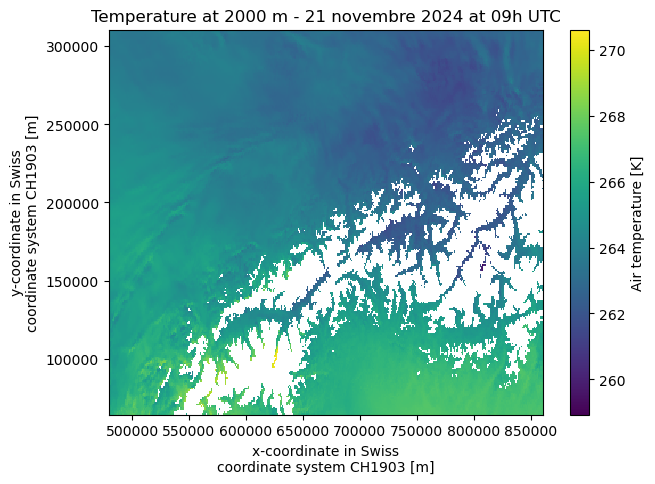

In [2]:
import matplotlib.pyplot as plt
# Temp z = 2000 m
temp2000 = ds["T"].sel(z_1=2000, method="nearest").squeeze()

plt.figure(figsize=(7,5))
temp2000.plot()
plt.title("Temperature at 2000 m - 21 novembre 2024 at 09h UTC")
plt.show()

C:\Users\Emilie Maillard\anaconda3\Lib\site-packages\cartopy\mpl\feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


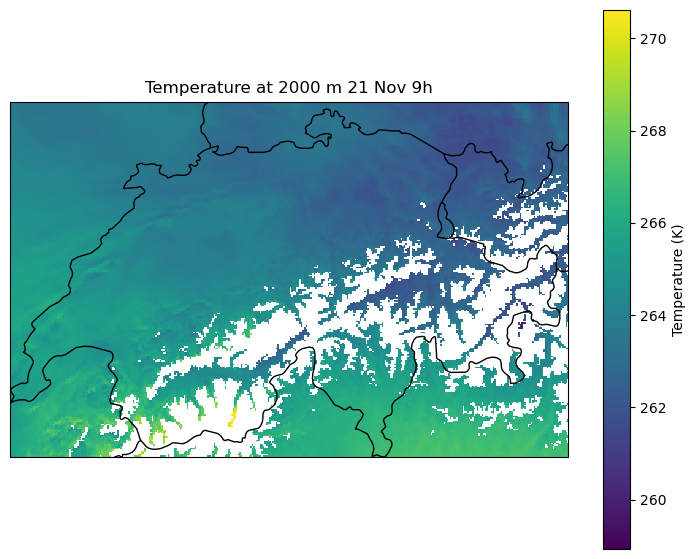

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Projection suisse CH1903 (EPSG:21781)
proj_swiss = ccrs.epsg(21781)

#temperature at 2000 m
temp2000 = ds["T"].sel(z_1=2000, method="nearest").squeeze()

fig = plt.figure(figsize=(9,7))
ax = plt.axes(projection=proj_swiss)

# colored map
mesh = ax.pcolormesh(
    ds["x_1"], ds["y_1"], temp2000,
    transform=proj_swiss,
    shading="auto"
)

# country boundaries
ax.add_feature(cfeature.BORDERS, linewidth=1, color="black")
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)

# Colors
plt.colorbar(mesh, ax=ax, label="Temperature (K)")

ax.set_title("Temperature at 2000 m 21 Nov 9h")
plt.show()

In [3]:
import xarray as xr
import glob

files = sorted(glob.glob("kenda-ch1-eps_MDR_3D_d_20241121*.nc"))
ds_all = xr.open_mfdataset(files, combine='nested', concat_dim="time")

ds_all


<xarray.Dataset>
Dimensions:         (time: 15, x_1: 381, y_1: 246, z_1: 29)
Coordinates:
  * time            (time) datetime64[ns] 2024-11-21T09:00:00 ... 2024-11-21T...
  * x_1             (x_1) float32 4.8e+05 4.81e+05 4.82e+05 ... 8.59e+05 8.6e+05
  * y_1             (y_1) float32 6.5e+04 6.6e+04 6.7e+04 ... 3.09e+05 3.1e+05
    lon_1           (y_1, x_1) float32 dask.array<chunksize=(246, 381), meta=np.ndarray>
    lat_1           (y_1, x_1) float32 dask.array<chunksize=(246, 381), meta=np.ndarray>
  * z_1             (z_1) float32 500.0 750.0 1e+03 ... 9e+03 9.5e+03 1e+04
Data variables: (12/16)
    grid_mapping_1  (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    FF              (time, z_1, y_1, x_1) float32 dask.array<chunksize=(1, 29, 246, 381), meta=np.ndarray>
    DD              (time, z_1, y_1, x_1) float32 dask.array<chunksize=(1, 29, 246, 381), meta=np.ndarray>
    v_on_z          (time, z_1, y_1, x_1) float32 dask.array<chunksize=(1, 29, 246, 381), meta=np.ndarray>
    RELHUM          (time, z_1, y_1, x_1) float32 dask.array<chunksize=(1, 29, 246, 381), meta=np.ndarray>
    P               (time, z_1, y_1, x_1) float32 dask.array<chunksize=(1, 29, 246, 381), meta=np.ndarray>
    ...              ...
    QV              (time, z_1, y_1, x_1) float32 dask.array<chunksize=(1, 29, 246, 381), meta=np.ndarray>
    HZEROCL         (time, y_1, x_1) float32 dask.array<chunksize=(1, 246, 381), meta=np.ndarray>
    TD              (time, z_1, y_1, x_1) float32 dask.array<chunksize=(1, 29, 246, 381), meta=np.ndarray>
    THETA           (time, z_1, y_1, x_1) float32 dask.array<chunksize=(1, 29, 246, 381), meta=np.ndarray>
    TOT_PREC        (time, y_1, x_1) float32 dask.array<chunksize=(1, 246, 381), meta=np.ndarray>
    T               (time, z_1, y_1, x_1) float32 dask.array<chunksize=(1, 29, 246, 381), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.6
    ConventionsURL:  http://cfconventions.org/cf-conventions/v1.6.0/cf-conven...
    institution:     MeteoSwiss (NMC Switzerland)
    source:          model: kenda-ch1, production_status: unknown, version: n...
    history:         Produced by fieldextra version v15.0.3 (v15.0.3) on 2025...

C:\Users\Emilie Maillard\anaconda3\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


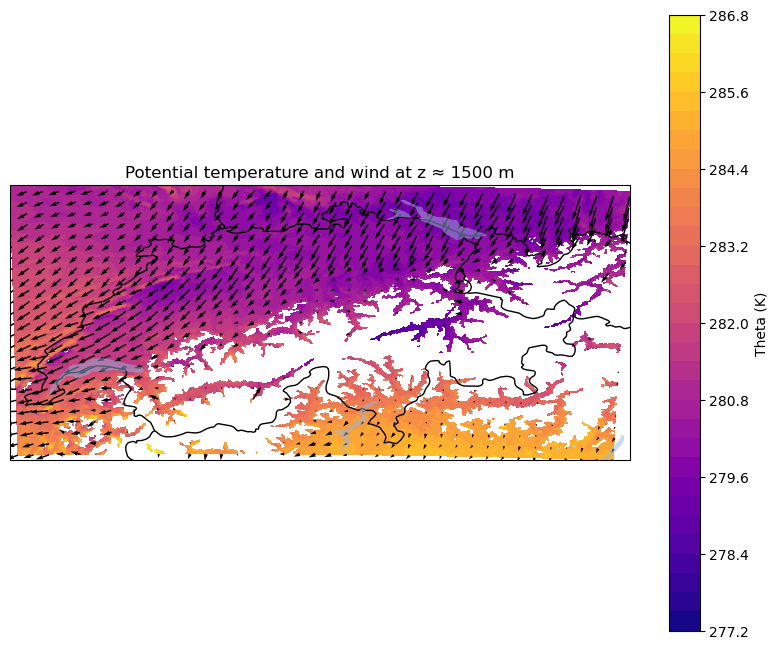

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# time = 9h and level = 1500m
t0 = ds_all.isel(time=0)
level = t0.sel(z_1=1500, method="nearest")

lon = t0.lon_1
lat = t0.lat_1

#wind speed in vector
theta = level.THETA
u = level.FF * np.cos(np.deg2rad(level.DD))
v = level.FF * np.sin(np.deg2rad(level.DD))

plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)

cs = plt.contourf(lon, lat, theta, levels=30, cmap="plasma")
plt.colorbar(cs, label="Theta (K)")

plt.quiver(
    lon[::10, ::10],
    lat[::10, ::10],
    u[::10, ::10],
    v[::10, ::10],
    scale=400
)

plt.title("Potential temperature and wind at z ≈ 1500 m")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()





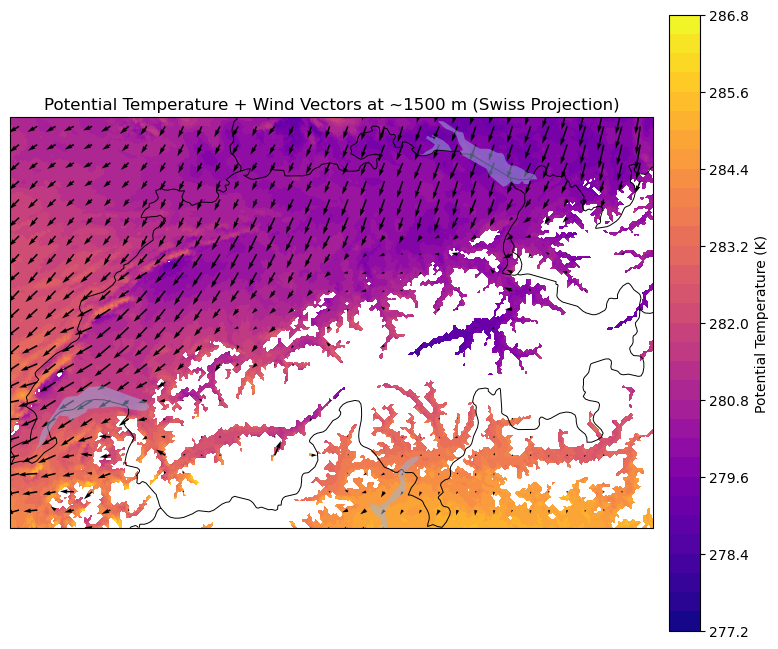

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# time = 9h et level = 1500m
t0 = ds_all.isel(time=0)
level = t0.sel(z_1=1500, method="nearest")

# variables
lon = t0.lon_1
lat = t0.lat_1
theta = level.THETA
ff = level.FF
dd = level.DD

# vent en composantes u/v
u = ff * np.cos(np.deg2rad(dd))
v = ff * np.sin(np.deg2rad(dd))

# conversion xarray -> numpy
lon2d = lon.values
lat2d = lat.values
theta2d = theta.values
u2d = u.values
v2d = v.values

# projection suisse
proj_swiss = ccrs.epsg(21781)
data_proj = ccrs.PlateCarree()

# figure
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=proj_swiss)

ax.add_feature(cfeature.BORDERS, linewidth=0.7)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAKES, alpha=0.5)

# carte theta
cs = ax.contourf(
    lon2d,
    lat2d,
    theta2d,
    levels=30,
    cmap="plasma",
    transform=data_proj
)

# colorbar
cbar = plt.colorbar(cs, orientation="vertical", pad=0.02)
cbar.set_label("Potential Temperature (K)")

# vecteurs de vent
ax.quiver(
    lon2d[::10, ::10],
    lat2d[::10, ::10],
    u2d[::10, ::10],
    v2d[::10, ::10],
    transform=data_proj,
    scale=400
)

plt.title("Potential Temperature + Wind Vectors at ~1500 m (Swiss Projection)")
plt.show()


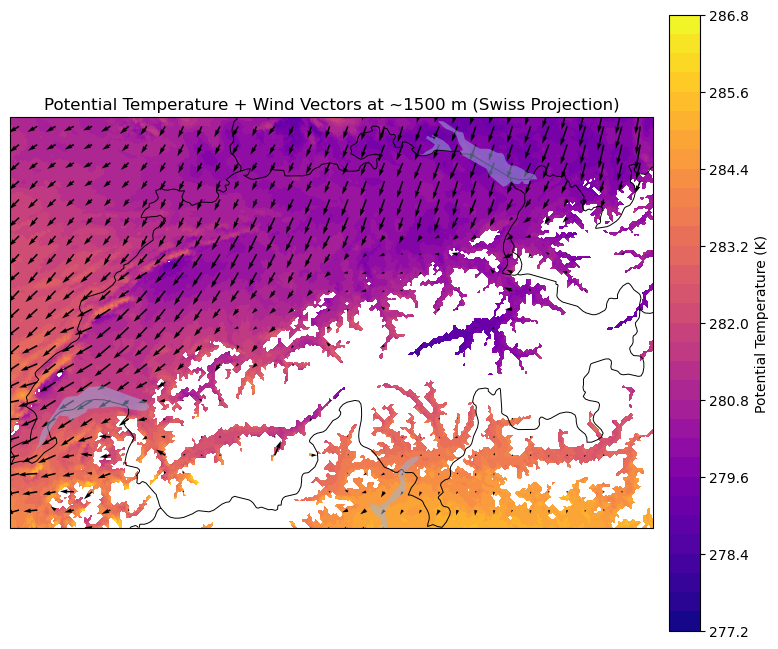

In [15]:
# time = 10h et level = 1500m
t10 = ds_all.isel(time=0)
level = t10.sel(z_1=1500, method="nearest")

# variables
lon = t10.lon_1
lat = t10.lat_1
theta = level.THETA
ff = level.FF
dd = level.DD

# vent en composantes u/v
u = ff * np.cos(np.deg2rad(dd))
v = ff * np.sin(np.deg2rad(dd))

# conversion xarray -> numpy
lon2d = lon.values
lat2d = lat.values
theta2d = theta.values
u2d = u.values
v2d = v.values

# projection suisse
proj_swiss = ccrs.epsg(21781)
data_proj = ccrs.PlateCarree()

# figure
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=proj_swiss)

ax.add_feature(cfeature.BORDERS, linewidth=0.7)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAKES, alpha=0.5)

# carte theta
cs = ax.contourf(
    lon2d,
    lat2d,
    theta2d,
    levels=30,
    cmap="plasma",
    transform=data_proj
)

# colorbar
cbar = plt.colorbar(cs, orientation="vertical", pad=0.02)
cbar.set_label("Potential Temperature (K)")

# vecteurs de vent
ax.quiver(
    lon2d[::10, ::10],
    lat2d[::10, ::10],
    u2d[::10, ::10],
    v2d[::10, ::10],
    transform=data_proj,
    scale=400
)

plt.title("Potential Temperature + Wind Vectors at ~1500 m (Swiss Projection)")
plt.show()
